範例 (XGBoost)

In [31]:
# ! pip install shap

In [32]:
import xgboost

import shap
shap.plots.initjs()

In [33]:
# train an XGBoost model
X, y = shap.datasets.california()
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [34]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [35]:
model = xgboost.XGBRegressor().fit(X, y)

In [36]:
# explain the model's predictions using SHAP
# explainer = shap.Explainer(model)
# shap_values = explainer(X)

explainer = shap.TreeExplainer(model)
shap_values = explainer(X)

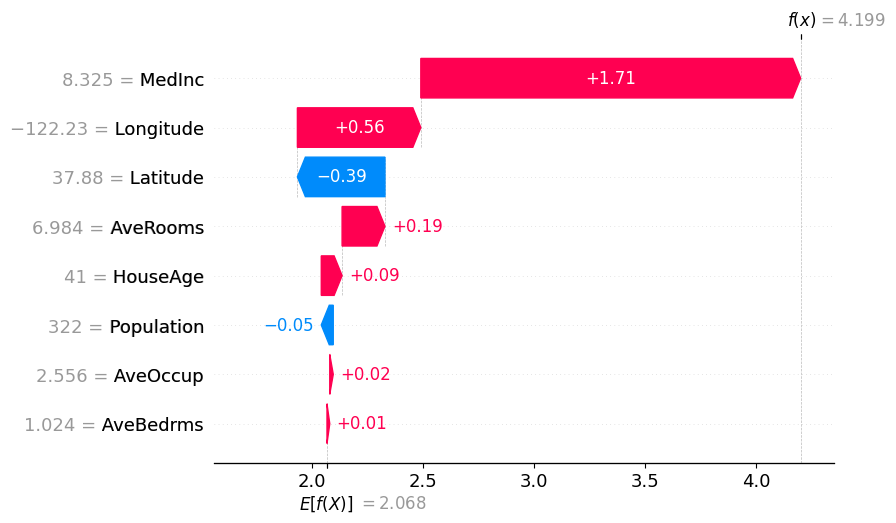

In [37]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

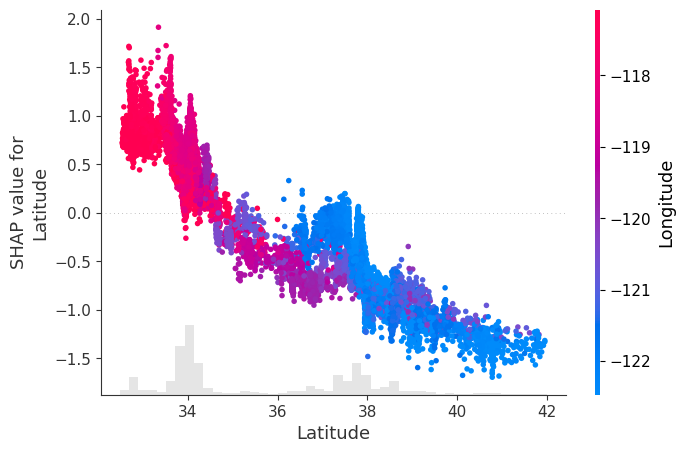

In [38]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "Latitude"], color=shap_values)

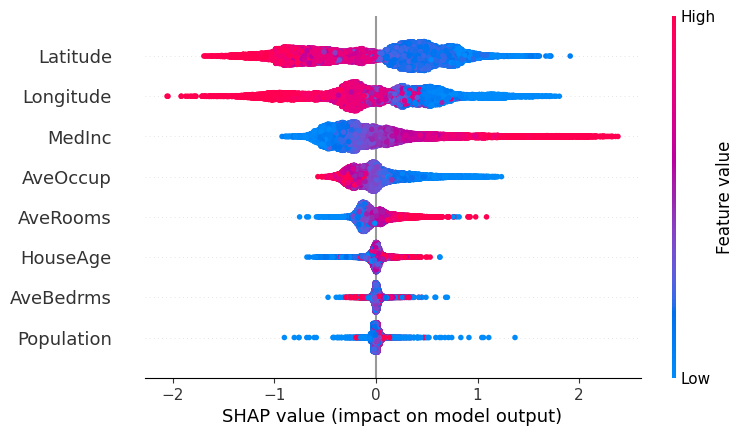

In [39]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

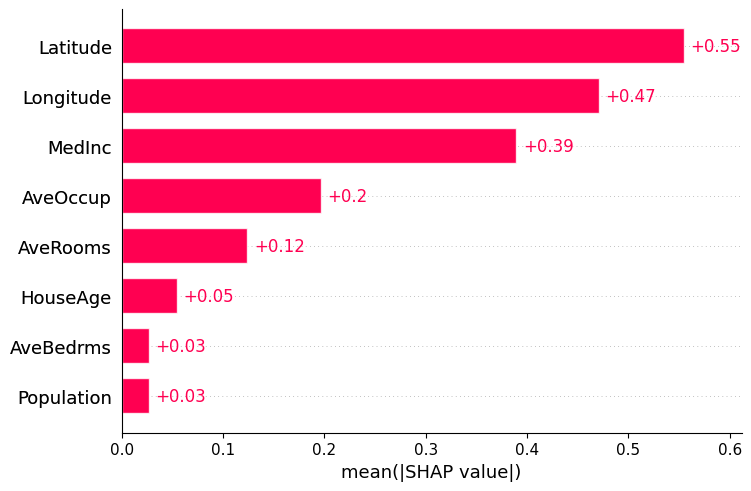

In [40]:
shap.plots.bar(shap_values)

https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Front%20page%20example%20%28XGBoost%29.html